
# California Community College Student Enrollment Trend -<br /> Pre & Post Covid-19 Pandemic Analysis

### INTRODUCTION


**Description:** The goal of this project is to analyze the dataset of all community colleges in California between the academic years of 2016 & 2017 to 2022 & 2023. By viewing the different student enrollment trends, we can analyze the data to see if the Covid-19 pandemic had an impact on student enrollment trends throughout California's community colleges. Through the data, we can see different enrollment trends 


**Sources**:
* California Community College Chancelor's Office -- [source](https://datamart.cccco.edu/Students/Education_Status_Summary.aspx)

**Important Notes**: The dataset retrieved from the [source](https://datamart.cccco.edu/Students/Education_Status_Summary.aspx) has been filtered to query data of Full Time Equivalent Students - FTES. This decision was made so that the data observed will be focused on all students who are committed to attending college full-time. If someone only takes a 4-unit class in a quarter, the person would count as 1/3 of a FTES because 12 units is considered full time.

"WHAT IS FTES?
A “full-time equivalent student” is an enrolled student who attends 15 hours each week during
the semester (or a group of students who, together, attend 15 hours each week) . In an academic
year, this hypothetical full-time student generates 525 student contact hours . Even though not all
students are full-time and not all classes are scheduled for 17.5 weeks, this definition provides a
12 
UNDERSTANDING AND CALCULATING FTES AND EFFICIENCY

unit of measure applicable to all classes and calendar types (e.g., traditional length, flexible, and
compressed). This definition of full-time is used for funding calculations only, not for classifying
the status of actual students for financial aid or other purposes.
The student attendance accounting framework in place since 1988 uses a full-time equivalency
unit of measure called FTES (Full-Time Equivalent Student) that is calculated by dividing total
student contact hours (TSCH) by 525, providing a standardized “workload measure” basis for
college funding . The basic formula for FTES calculation is
FTES = Total Student Contact Hours (TSCH) ÷ 525
To summarize, ONE FTES represents:
• 	
 	
 	
 	
1 student (or a group of students)
• Attending 15 hours per week
• For two semesters of 17.5 weeks (3 quarters of 11.67 weeks) for
• A TOTAL of 525 contact hours 
"



#### IMPORTING LIBRARIES & DATASET



The dataset downloaded from the California Community College Chancelor's Office [website] (https://datamart.cccco.edu/Students/Education_Status_Summary.aspx). The raw dataset contains information about each community colleges in California. We will do a preliminary reading of the dataset to clean the dataset to be usable for data analysis.

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
from matplotlib.ticker import StrMethodFormatter

In [2]:
# preliminary reading of the dataset into a Pandas DataFrame
student_enrollment_prelim_DF = pd.read_csv('CC_FTES_enrollment_16_23.csv')
print("California Community Colleges Student Enrollment DataFrame [Preliminary View]:")
student_enrollment_prelim_DF

California Community Colleges Student Enrollment DataFrame [Preliminary View]:


,Unnamed: 0,Unnamed: 1,Annual 2016-2017,Annual 2016-2017.1,Annual 2016-2017.2,Annual 2016-2017.3,Annual 2016-2017.4,Annual 2016-2017.5,Annual 2016-2017.6,Annual 2017-2018,...,Annual 2021-2022.4,Annual 2021-2022.5,Annual 2021-2022.6,Annual 2022-2023,Annual 2022-2023.1,Annual 2022-2023.2,Annual 2022-2023.3,Annual 2022-2023.4,Annual 2022-2023.5,Annual 2022-2023.6
0,State Name,College Name,Transferable Credit FTES,Credit FTES,Non-Credit FTES,Total FTES,Vocational Education Credit FTES,Vocational Education Non Credit FTES,Vocational Education Total FTES,Transferable Credit FTES,...,Vocational Education Credit FTES,Vocational Education Non Credit FTES,Vocational Education Total FTES,Transferable Credit FTES,Credit FTES,Non-Credit FTES,Total FTES,Vocational Education Credit FTES,Vocational Education Non Credit FTES,Vocational Education Total FTES
1,State of California,Alameda,"2,865.40","3,628.11",49.95,"3,678.06",848.69,0.74,849.43,"3,058.23",...,636.61,6.43,643.04,"2,365.74","2,750.46",99.46,"2,849.92",694.75,6.50,701.25
2,State of California,Allan Hancock,"7,094.62","9,408.65",949.76,"10,358.41","3,527.38",273.18,"3,800.55","6,980.97",...,"3,046.12",94.14,"3,140.26","6,387.67","7,944.01",569.59,"8,513.60","3,335.69",115.06,"3,450.75"
3,State of California,American River,"14,148.12","21,921.99",39.26,"21,961.24","8,782.15",0.00,"8,782.15","13,685.71",...,"7,238.31",0.00,"7,238.31","12,261.23","18,945.60",0.00,"18,945.60","9,276.61",0.00,"9,276.61"
4,State of California,Antelope Valley,"8,455.22","10,834.68",71.78,"10,906.46","2,751.13",0.00,"2,751.13","8,424.37",...,"2,465.29",6.64,"2,471.93","7,691.37","8,913.80",55.80,"8,969.60","2,947.73",7.22,"2,954.95"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,State of California,West Hills Lemoore,"2,505.70","3,119.20",339.16,"3,458.37",668.68,0.00,668.68,"2,731.28",...,572.02,1.03,573.05,"2,500.74","2,633.94",20.69,"2,654.63",598.10,0.84,598.94
117,State of California,West LA,"6,339.98","7,524.97",371.09,"7,896.06","2,591.63",3.53,"2,595.16","6,732.30",...,"2,080.84",14.15,"2,094.99","4,981.76","5,420.91",147.42,"5,568.33","2,129.47",26.74,"2,156.21"
118,State of California,West Valley,"5,400.83","6,180.44",516.69,"6,697.13","1,333.29",0.64,"1,333.93","5,282.97",...,"1,197.08",130.50,"1,327.57","4,999.48","5,090.10",554.10,"5,644.20","1,183.11",151.67,"1,334.78"
119,State of California,Woodland,"2,312.78","2,767.98",19.24,"2,787.22",616.79,0.00,616.79,"2,102.81",...,547.14,0.00,547.14,"2,125.75","2,272.55",59.98,"2,332.54",620.47,0.50,620.97


### DATA CLEANING

In [3]:
# clean up data: drop unnecessary columns, clean up column labels, and row indices

# drop the first column 'Unnamed:0' since it has "State of California" for all entries
student_enrollment_prelim_DF.drop(student_enrollment_prelim_DF.columns[0], axis=1, inplace=True)

# combine DataFrame column name with first row to combine year and type of FTES enrollment to assign new column labels
year_label = [col.split('.')[0] for col in student_enrollment_prelim_DF.columns]
category_label = student_enrollment_prelim_DF.iloc[0]
student_enrollment_prelim_DF.columns = [f"{year} {category}" for year, category in zip(year_label, category_label)]
student_enrollment_prelim_DF = student_enrollment_prelim_DF.drop(student_enrollment_prelim_DF.index[0])

# simplify column names for readability
# extract everything (.*) but [^] Annual and FTES
student_enrollment_prelim_DF.columns = student_enrollment_prelim_DF.columns.str.extract('([^Annual]+.*[^FTES])',expand=False)
# replace Education with with ''
student_enrollment_prelim_DF.columns = student_enrollment_prelim_DF.columns.str.replace('Education', '')

# set index to college names
student_enrollment_prelim_DF.rename(columns={'Unnamed: 1 College Name': ' '}, inplace=True)
student_enrollment_prelim_DF = student_enrollment_prelim_DF.set_index(student_enrollment_prelim_DF.columns[0])

# filter and drop columns that show Credit/Non-credit, save just the total
cols = []
for i in range(0, len(student_enrollment_prelim_DF.columns), 7):
    cols.append(i)
    cols.append(i+3)
    cols.append(i+6)
# print(cols) #[0, 3, 6, 7, 10, 13, 14, 17, 20, 21, 24, 27, 28, 31, 34, 35, 38, 41, 42, 45, 48]

# make a view of just the selected columns
student_enrollment_prelim_DF = student_enrollment_prelim_DF[student_enrollment_prelim_DF.columns[cols]]
student_enrollment_prelim_DF

,2016-2017 Transferable Credit,2016-2017 Total,2016-2017 Vocational Total,2017-2018 Transferable Credit,2017-2018 Total,2017-2018 Vocational Total,2018-2019 Transferable Credit,2018-2019 Total,2018-2019 Vocational Total,2019-2020 Transferable Credit,...,2019-2020 Vocational Total,2020-2021 Transferable Credit,2020-2021 Total,2020-2021 Vocational Total,2021-2022 Transferable Credit,2021-2022 Total,2021-2022 Vocational Total,2022-2023 Transferable Credit,2022-2023 Total,2022-2023 Vocational Total
,,,,,,,,,,,,,,,,,,,,,
Alameda,"2,865.40","3,678.06",849.43,"3,058.23","3,805.60",907.10,"3,006.64","3,626.70",863.55,"2,911.00",...,867.21,"2,591.51","3,027.45",689.95,"2,140.06","2,581.36",643.04,"2,365.74","2,849.92",701.25
Allan Hancock,"7,094.62","10,358.41","3,800.55","6,980.97","10,053.89","3,666.84","7,047.29","9,881.01","3,586.51","7,385.40",...,"3,543.32","6,479.83","8,302.41","2,832.51","6,100.44","8,184.19","3,140.26","6,387.67","8,513.60","3,450.75"
American River,"14,148.12","21,961.24","8,782.15","13,685.71","22,098.89","9,377.21","14,196.56","23,544.05","11,051.61","14,459.08",...,"9,858.14","13,361.98","16,870.91","5,607.87","12,274.61","17,175.66","7,238.31","12,261.23","18,945.60","9,276.61"
Antelope Valley,"8,455.22","10,906.46","2,751.13","8,424.37","11,069.41","2,805.49","8,702.46","11,085.00","2,971.20","9,502.42",...,"3,222.86","8,043.05","9,278.45","2,683.22","7,179.74","8,326.93","2,471.93","7,691.37","8,969.60","2,954.95"
Bakersfield,"11,616.45","15,526.00","4,567.71","12,708.11","17,033.64","4,971.16","13,035.64","18,272.06","5,238.26","15,028.14",...,"5,699.83","14,786.86","18,701.66","5,798.47","13,792.95","17,055.24","5,688.57","9,797.02","10,820.92","3,258.98"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Hills Lemoore,"2,505.70","3,458.37",668.68,"2,731.28","3,606.55",663.10,"2,687.92","3,494.11",647.47,"2,870.73",...,635.42,"2,553.54","2,725.20",633.54,"2,257.82","2,570.14",573.05,"2,500.74","2,654.63",598.94
West LA,"6,339.98","7,896.06","2,595.16","6,732.30","8,034.99","2,536.90","7,120.11","8,489.88","2,774.33","7,476.78",...,"2,910.94","6,512.43","7,275.18","2,396.90","5,588.71","6,248.74","2,094.99","4,981.76","5,568.33","2,156.21"
West Valley,"5,400.83","6,697.13","1,333.93","5,282.97","6,241.78","1,195.82","5,495.27","6,566.24","1,265.13","5,747.57",...,"1,321.50","5,518.68","5,946.88","1,464.44","4,805.51","5,320.74","1,327.57","4,999.48","5,644.20","1,334.78"


In [4]:
# check for NaN in the cleaned DataFrame
print("Check for NaN values:")
display(student_enrollment_prelim_DF[student_enrollment_prelim_DF.isna().any(axis=1)]) 
# drop NaN's
Cali_CC_student_enrollment_DF = student_enrollment_prelim_DF.dropna()

Check for NaN values:


,2016-2017 Transferable Credit,2016-2017 Total,2016-2017 Vocational Total,2017-2018 Transferable Credit,2017-2018 Total,2017-2018 Vocational Total,2018-2019 Transferable Credit,2018-2019 Total,2018-2019 Vocational Total,2019-2020 Transferable Credit,...,2019-2020 Vocational Total,2020-2021 Transferable Credit,2020-2021 Total,2020-2021 Vocational Total,2021-2022 Transferable Credit,2021-2022 Total,2021-2022 Vocational Total,2022-2023 Transferable Credit,2022-2023 Total,2022-2023 Vocational Total
,,,,,,,,,,,,,,,,,,,,,
CalBright,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,28.23,0.00,260.54,171.40,0.00,491.14,373.71,0.00,581.69,434.07
LA ITV,365.01,665.02,0.00,58.11,131.78,0.00,32.47,60.56,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"2,139.08","2,280.99",539.64,"2,565.45","2,759.63",718.48,"2,775.52","2,911.87",774.90
San Francisco Ctrs,0.00,"5,537.90",875.37,0.00,"5,865.19","1,113.42",0.00,"4,980.31",949.05,0.00,...,649.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    NOTE: For the purpose of this project, we will drop the four colleges CalBright, LA ITV, Madera, and San Franci-sco Ctrs from the data as they contain NaN values which could have an impact on our analysis. The NaN values  are evident throughout each record and thus these records show no value to the analysis of the dataset. 

In [5]:
# convert all columns to numpy
Cali_CC_student_enrollment_DF = Cali_CC_student_enrollment_DF.replace({',': ''}, regex=True).astype('float64')
print("California Community Colleges Student Enrollment DataFrame [Cleaned View]:")
pd.set_option('display.float_format', '{:.2f}'.format)
Cali_CC_student_enrollment_DF

California Community Colleges Student Enrollment DataFrame [Cleaned View]:


,2016-2017 Transferable Credit,2016-2017 Total,2016-2017 Vocational Total,2017-2018 Transferable Credit,2017-2018 Total,2017-2018 Vocational Total,2018-2019 Transferable Credit,2018-2019 Total,2018-2019 Vocational Total,2019-2020 Transferable Credit,...,2019-2020 Vocational Total,2020-2021 Transferable Credit,2020-2021 Total,2020-2021 Vocational Total,2021-2022 Transferable Credit,2021-2022 Total,2021-2022 Vocational Total,2022-2023 Transferable Credit,2022-2023 Total,2022-2023 Vocational Total
,,,,,,,,,,,,,,,,,,,,,
Alameda,2865.40,3678.06,849.43,3058.23,3805.60,907.10,3006.64,3626.70,863.55,2911.00,...,867.21,2591.51,3027.45,689.95,2140.06,2581.36,643.04,2365.74,2849.92,701.25
Allan Hancock,7094.62,10358.41,3800.55,6980.97,10053.89,3666.84,7047.29,9881.01,3586.51,7385.40,...,3543.32,6479.83,8302.41,2832.51,6100.44,8184.19,3140.26,6387.67,8513.60,3450.75
American River,14148.12,21961.24,8782.15,13685.71,22098.89,9377.21,14196.56,23544.05,11051.61,14459.08,...,9858.14,13361.98,16870.91,5607.87,12274.61,17175.66,7238.31,12261.23,18945.60,9276.61
Antelope Valley,8455.22,10906.46,2751.13,8424.37,11069.41,2805.49,8702.46,11085.00,2971.20,9502.42,...,3222.86,8043.05,9278.45,2683.22,7179.74,8326.93,2471.93,7691.37,8969.60,2954.95
Bakersfield,11616.45,15526.00,4567.71,12708.11,17033.64,4971.16,13035.64,18272.06,5238.26,15028.14,...,5699.83,14786.86,18701.66,5798.47,13792.95,17055.24,5688.57,9797.02,10820.92,3258.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Hills Lemoore,2505.70,3458.37,668.68,2731.28,3606.55,663.10,2687.92,3494.11,647.47,2870.73,...,635.42,2553.54,2725.20,633.54,2257.82,2570.14,573.05,2500.74,2654.63,598.94
West LA,6339.98,7896.06,2595.16,6732.30,8034.99,2536.90,7120.11,8489.88,2774.33,7476.78,...,2910.94,6512.43,7275.18,2396.90,5588.71,6248.74,2094.99,4981.76,5568.33,2156.21
West Valley,5400.83,6697.13,1333.93,5282.97,6241.78,1195.82,5495.27,6566.24,1265.13,5747.57,...,1321.50,5518.68,5946.88,1464.44,4805.51,5320.74,1327.57,4999.48,5644.20,1334.78


### DATA ANALYSIS

Total enrollment trend for the past 7 years for each category of student enrollments: transfer, general, vocational.

<b> Total Transferable FTES:

In [6]:
# Transferable column is every 0th and every 3rd column, for the 7 years
col = [] 
for i in range(0,len(Cali_CC_student_enrollment_DF.columns),3):
    col.append(i)
    
transferable_DataFrame = Cali_CC_student_enrollment_DF[Cali_CC_student_enrollment_DF.columns[col]]
# change the index so it contains the years only 
transferable_DataFrame.columns = transferable_DataFrame.columns.str.extract('([0-9]+-[0-9]+)',expand=False)

print("Transferable Total Enrollment:")
display(transferable_DataFrame)
print("Transferable Total Enrollment by Year:")
transferable_DataFrame.sum()

Transferable Total Enrollment:


,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
,,,,,,,
Alameda,2865.40,3058.23,3006.64,2911.00,2591.51,2140.06,2365.74
Allan Hancock,7094.62,6980.97,7047.29,7385.40,6479.83,6100.44,6387.67
American River,14148.12,13685.71,14196.56,14459.08,13361.98,12274.61,12261.23
Antelope Valley,8455.22,8424.37,8702.46,9502.42,8043.05,7179.74,7691.37
Bakersfield,11616.45,12708.11,13035.64,15028.14,14786.86,13792.95,9797.02
...,...,...,...,...,...,...,...
West Hills Lemoore,2505.70,2731.28,2687.92,2870.73,2553.54,2257.82,2500.74
West LA,6339.98,6732.30,7120.11,7476.78,6512.43,5588.71,4981.76
West Valley,5400.83,5282.97,5495.27,5747.57,5518.68,4805.51,4999.48


Transferable Total Enrollment by Year:


2016-2017   896691.09
2017-2018   908686.41
2018-2019   926712.44
2019-2020   961908.05
2020-2021   907335.52
2021-2022   816676.37
2022-2023   826606.98
dtype: float64

<b> Total General (Credit/Non-credit) FTES:

In [7]:
# General column is every 1st and every 3rd column, for the 7 years
col = [] 
for i in range(1,len(Cali_CC_student_enrollment_DF.columns),3):
    col.append(i)
    
general_DataFrame = Cali_CC_student_enrollment_DF[Cali_CC_student_enrollment_DF.columns[col]]
# change the index so it contains the years only 
general_DataFrame.columns = general_DataFrame.columns.str.extract('([0-9]+-[0-9]+)',expand=False)

print("General Total Enrollment:")
display(general_DataFrame)
print("General Total Enrollment by Year:")
general_DataFrame.sum()

General Total Enrollment:


,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
,,,,,,,
Alameda,3678.06,3805.60,3626.70,3406.87,3027.45,2581.36,2849.92
Allan Hancock,10358.41,10053.89,9881.01,9745.82,8302.41,8184.19,8513.60
American River,21961.24,22098.89,23544.05,22036.45,16870.91,17175.66,18945.60
Antelope Valley,10906.46,11069.41,11085.00,11064.76,9278.45,8326.93,8969.60
Bakersfield,15526.00,17033.64,18272.06,18907.27,18701.66,17055.24,10820.92
...,...,...,...,...,...,...,...
West Hills Lemoore,3458.37,3606.55,3494.11,3496.37,2725.20,2570.14,2654.63
West LA,7896.06,8034.99,8489.88,8477.15,7275.18,6248.74,5568.33
West Valley,6697.13,6241.78,6566.24,6406.71,5946.88,5320.74,5644.20


General Total Enrollment by Year:


2016-2017   1177088.06
2017-2018   1182955.87
2018-2019   1172343.52
2019-2020   1145874.64
2020-2021   1063057.56
2021-2022    971180.49
2022-2023    992485.29
dtype: float64

<b> Total Vocational (Credit/Non-credit) FTES:

In [8]:
# Vocational column is every 2nd column and every 3rd column after, for the 7 years
col = [] 
for i in range(2,len(Cali_CC_student_enrollment_DF.columns),3):
    col.append(i)
    
vocational_DataFrame = Cali_CC_student_enrollment_DF[Cali_CC_student_enrollment_DF.columns[col]]
# change the index so it contains the years only 
vocational_DataFrame.columns = vocational_DataFrame.columns.str.extract('([0-9]+-[0-9]+)',expand=False)

print("Vocational Total Enrollment:")
display(vocational_DataFrame)
print("Vocational Total Enrollment by Year:")
vocational_DataFrame.sum()

Vocational Total Enrollment:


,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
,,,,,,,
Alameda,849.43,907.10,863.55,867.21,689.95,643.04,701.25
Allan Hancock,3800.55,3666.84,3586.51,3543.32,2832.51,3140.26,3450.75
American River,8782.15,9377.21,11051.61,9858.14,5607.87,7238.31,9276.61
Antelope Valley,2751.13,2805.49,2971.20,3222.86,2683.22,2471.93,2954.95
Bakersfield,4567.71,4971.16,5238.26,5699.83,5798.47,5688.57,3258.98
...,...,...,...,...,...,...,...
West Hills Lemoore,668.68,663.10,647.47,635.42,633.54,573.05,598.94
West LA,2595.16,2536.90,2774.33,2910.94,2396.90,2094.99,2156.21
West Valley,1333.93,1195.82,1265.13,1321.50,1464.44,1327.57,1334.78


Vocational Total Enrollment by Year:


2016-2017   316717.79
2017-2018   323508.91
2018-2019   326874.44
2019-2020   324201.81
2020-2021   293111.43
2021-2022   285528.43
2022-2023   295819.15
dtype: float64

### DATA ANALYSIS & VISUALIZATION (using Matplotlib)

<b><i><u>Line Plot to show the enrollment trend over the 7 years...

,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
Transfer,896691.090000,908686.410000,926712.440000,961908.050000,907335.520000,816676.370000,826606.980000
General,1177088.060000,1182955.870000,1172343.520000,1145874.640000,1063057.560000,971180.490000,992485.290000
Vocational,316717.790000,323508.910000,326874.440000,324201.810000,293111.430000,285528.430000,295819.150000


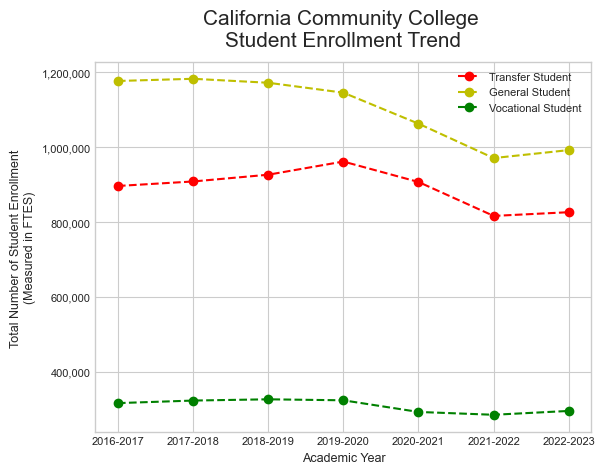

In [9]:
fig = plt.figure()
plt.title("California Community College \nStudent Enrollment Trend",fontsize=15,y=1.02)
plt.xlabel("Academic Year",fontsize=9)
plt.ylabel("Total Number of Student Enrollment \n(Measured in FTES)",fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# make dataFrames out of the 3 totals
FTES_dataframe = pd.concat([transferable_DataFrame.sum(), general_DataFrame.sum(), vocational_DataFrame.sum()], axis=1)

# set columns to Transfer, General, Vocational
FTES_dataframe.columns = ['Transfer','General','Vocational']

index = FTES_dataframe.index
pd.set_option('float_format', '{:f}'.format)
plt.plot(index,FTES_dataframe['Transfer'] , 'ro--', label='Transfer Student')
plt.plot(index,FTES_dataframe['General'] , 'yo--', label='General Student')
plt.plot(index,FTES_dataframe['Vocational'] , 'go--', label='Vocational Student')
plt.legend(fontsize=8)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

FTES_dataframe = FTES_dataframe.transpose()
FTES_dataframe

<b>Line Plot Observation & Analysis:
    
From my observation, the line plot above shows that enrollment numbers were much higher for general students and transfer students compare to vocational students. I believe the enrollment number is much higher for General and Transfer students than Vocational students because we are looking at a data of California Community College student enrollment. Private Colleges and UC's are more gear towards providing classes specific to the majors and programs that those schools offer to their specific set of students. However, community colleges on the otherhand, offer a variety of classes for many type of students with 'general' interest to learn many topics or subjects. In addition, Community Colleges offer tag programs where students can to take many transferable classes as a gateway to transfer to a 4-year college to get their Bachelors degree. I believe these more readily avaiable options at community colleges have an impact on why there are more transfer students and general students enrollment in the data. 

The line plot also shows that the total number of student enrollment decreased for all three categories of students during the three years, 2019-2020 until 2021-2022. Since we are observing real world data, I believe that Covid-19 pandemic, which peaked during the 2019-2020 and "eased out" during 2021-2022, had an affect for all categories of students that were attending or planning to attend community colleges. From the line plot it is visible that all three categories of students are decreasing through the 3 years of when the pandemic started. Comparing the school year 2018-2019 through 2021-2022, transfer student and general student enrollment numbers both have decreased a significant amount from 2018-2019. Vocational students has seen a decrease over those year as well but a very slight one compared to vocational students and transfer students. Since all three cateogires of student's enrollment numbers had decreased during the same period of time as Covid-19, I believe the pandemic had an negative effect on all students enrolling for classes. 


<b><i><u>Enrollment Change Pre-Pandemic & Post-Pandemic
    
* Calculate percent change in total enrollment for each school between 2 years before the pandemic (2017-2018) and  years after the height of the pandemic (2022-2023).
* Find the total enrollment for each school.
    

In [10]:
# Find the total for the year 2016-2017
totalEnrollment_2016_2017 = Cali_CC_student_enrollment_DF.iloc[:,0:3].sum(axis=1)

# Find the total for the year 2022-2023
totalEnrollment_2022_2023 = Cali_CC_student_enrollment_DF.iloc[:,-3:].sum(axis=1)

# Combine two to create new DataFrame
enrollmentChange_DataFrame = pd.concat([totalEnrollment_2016_2017, totalEnrollment_2022_2023], axis=1)
enrollmentChange_DataFrame.columns = ['2016-2017', '2022-2023']
print("Total Enrollment for each Community College \n(2016-2017 & 2022-2023):")
enrollmentChange_DataFrame

Total Enrollment for each Community College 
(2016-2017 & 2022-2023):


,2016-2017,2022-2023
,,
Alameda,7392.890000,5916.910000
Allan Hancock,21253.580000,18352.020000
American River,44891.510000,40483.440000
Antelope Valley,22112.810000,19615.920000
Bakersfield,31710.160000,23876.920000
...,...,...
West Hills Lemoore,6632.750000,5754.310000
West LA,16831.200000,12706.300000
West Valley,13431.890000,11978.460000


*<b><u> We can compare the top 10 community colleges' total enrollment from academic years 2016-2017 & 2022-2023

In [11]:
print("Top Ten schools with largest enrollment in 2016 - 2017:")
enrollmentChange_DataFrame.sort_values(by='2016-2017',ascending=False).head(10)

Top Ten schools with largest enrollment in 2016 - 2017:


,2016-2017,2022-2023
,,
Mt San Antonio,60964.420000,61899.980000
Pasadena,53529.930000,39481.010000
Santa Monica,52569.660000,41945.160000
Fullerton,49168.900000,31174.240000
East LA,47231.980000,38032.350000
American River,44891.510000,40483.440000
Palomar,41058.110000,31110.480000
Santa Ana,40847.580000,50415.530000
Orange Coast,40075.420000,33046.690000


In [12]:
print("Top Ten schools with largest enrollment in 2022 - 2023:")
enrollmentChange_DataFrame.sort_values(by='2022-2023',ascending=False).head(10)

Top Ten schools with largest enrollment in 2022 - 2023:


,2016-2017,2022-2023
,,
Cerritos,37457.370000,82256.620000
Mt San Antonio,60964.420000,61899.980000
Santa Ana,40847.580000,50415.530000
El Camino,38450.540000,43511.250000
Santa Monica,52569.660000,41945.160000
American River,44891.510000,40483.440000
Long Beach,39488.480000,40232.150000
Pasadena,53529.930000,39481.010000
Fresno City,37190.620000,38412.770000


<b><u>Using the data above, we can calculate the percent change of total enrollment 2 years pre-pandemic and 2 years post pandemic.</u></b>
* <i>Percent change = (new value - original value) / original value * 100</i>
    
    
    

In [13]:
percent_change = (totalEnrollment_2022_2023 - totalEnrollment_2016_2017)/ totalEnrollment_2022_2023 * 100
# print(percent_change)

print("Percent change in student enrollment for CC colleges \nAcademic Years 2018-2019 & 2021-2022:")
percentChange_DataFrame = pd.DataFrame(percent_change, columns = ['Percent Change'])
percentChange_DataFrame

Percent change in student enrollment for CC colleges 
Academic Years 2018-2019 & 2021-2022:


,Percent Change
,
Alameda,-24.945115
Allan Hancock,-15.810576
American River,-10.888576
Antelope Valley,-12.728896
Bakersfield,-32.806744
...,...
West Hills Lemoore,-15.265775
West LA,-32.463424
West Valley,-12.133697


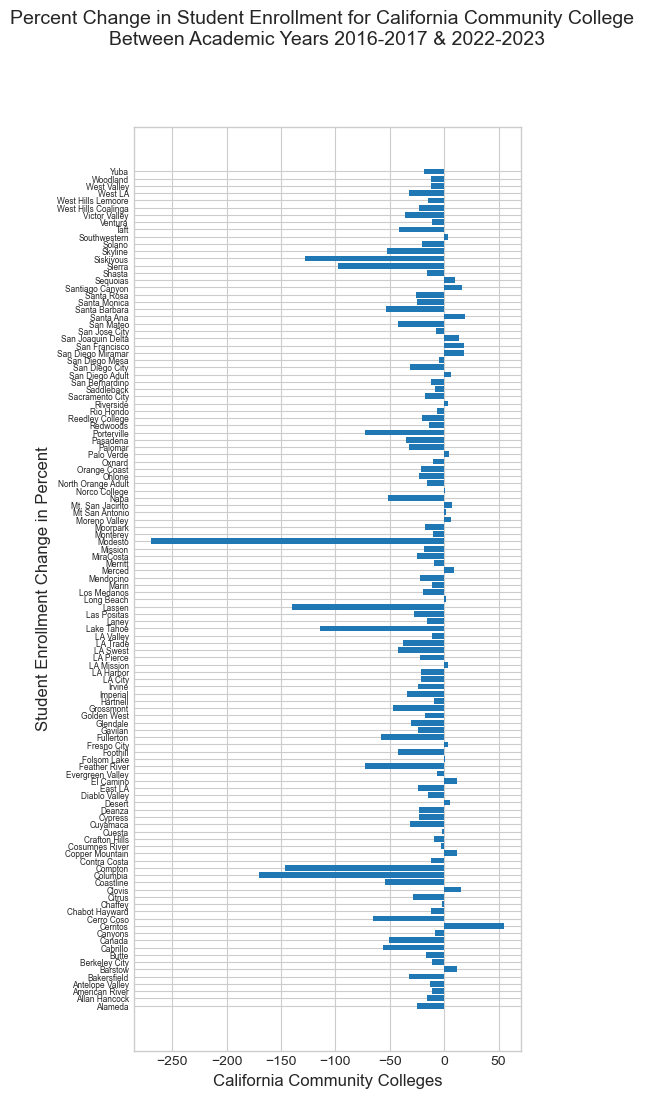

In [14]:
# use bar chart to show enrollment change of the schools 
fig = plt.figure(figsize=(5,12))

plt.title("Percent Change in Student Enrollment for California Community College  \nBetween Academic Years 2016-2017 & 2022-2023",fontsize=14,y=1.08)
plt.xlabel("California Community Colleges",fontsize=12)
plt.ylabel("Student Enrollment Change in Percent",fontsize=12)
plt.barh(percentChange_DataFrame.index.values, percentChange_DataFrame['Percent Change'], align="center")
plt.yticks(np.arange(len(percentChange_DataFrame.index.values)), percentChange_DataFrame.index.values, fontsize=6)
plt.show()


<b>Bar Chart Observation & Analysis:
    
From the bar chart above, it is evident that most colleges, except 7 colleges, had a negative impact or negative percent change, on their total student enrollment when comparing the two academic years, 2018-2019 and 2021-2022. The 7 colleges which had a beneficial impact are Imperial Community College, Modesto Community College, San Diego Adult Community College, San Diego Miramar Community College, San Joachin Delta Community College, Santa Ana Community College, and Santiago Canyon Community College. Unlike the 7 schools who had a positive percent change, the rest of the 109 colleges all had a negatively impacted enrollment change when comparing the two school years. From observing the data and the bar chart, I believe that Covid-19 pandemic had an overall negative impact on most, except 7, of all California Community Colleges. 

<b><u> Check for correlation between class size and change in enrollment.
    

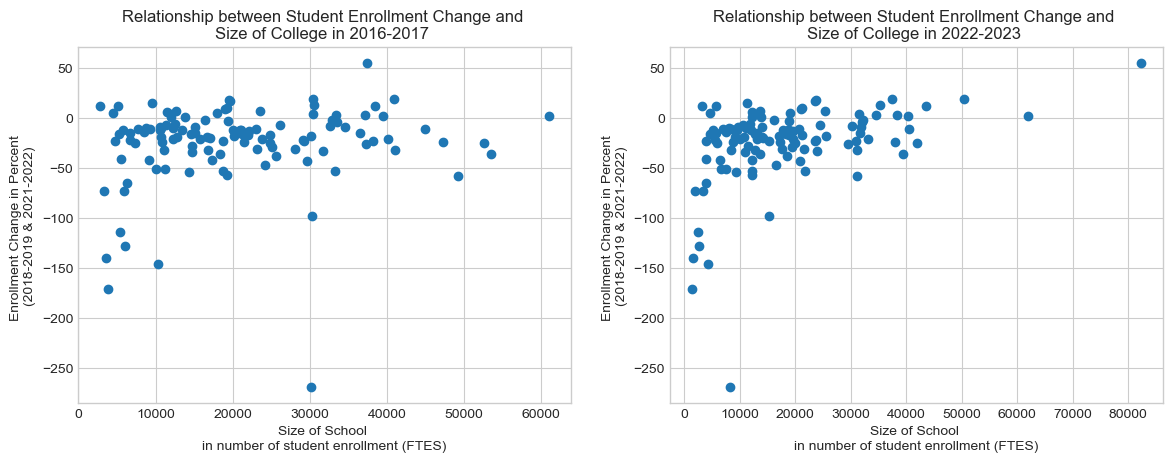

In [15]:
# create 2 subplots 
# to show correlation btwn size of school in first year and change in enrollment & last year and change in enrollment
fig = plt.figure(figsize=(14,4))

# set up the subplot 1
plt.subplot(1,2,1)  # 1 row, 2 cols, subplot 1
plt.subplots_adjust(top=1,wspace=0.2)

# create x and y arrays to plot into scatter plot 
percent  = percentChange_DataFrame['Percent Change'].values
enrollment = totalEnrollment_2016_2017.values
plt.scatter(enrollment,percent)   
plt.title("Relationship between Student Enrollment Change and \nSize of College in 2016-2017 ")
plt.ylabel("Enrollment Change in Percent \n(2018-2019 & 2021-2022)")
plt.xlabel("Size of School \nin number of student enrollment (FTES)")

# set up the subplot 2
plt.subplot(1,2,2)  # 1 row, 2 cols, subplot 1

# create x and y arrays to plot into scatter plot 
percent  = percentChange_DataFrame['Percent Change'].values
enrollment = totalEnrollment_2022_2023.values
plt.scatter(enrollment,percent)   
plt.title("Relationship between Student Enrollment Change and \nSize of College in 2022-2023 ")
plt.ylabel("Enrollment Change in Percent \n(2018-2019 & 2021-2022)")
plt.xlabel("Size of School \nin number of student enrollment (FTES)")
plt.show()


<b>Bar Chart Observation & Analysis:
    

### Conclusions from the data:

I believe.. 